# Discrete Fourier Transform

When the function and its transfomation is in the discretized space, the Fourier transform takes its discrete counterparFourier transform (DFT). The DFT has become a mainstay of numerical computing in part because of a very fast algorithm for computing it, called the Fast Fourier Transform (FFT)

This example shows how to perform an analysis using the FFT algorithm.

In [1]:
#Import necessary libraries

import numpy as np
np.set_printoptions(precision=2, suppress=True)  # for compact output

import matplotlib.pyplot as plt

## 1. Generate a signal we want to analyse.

We choose a sinusoidal signal at frequency <i>frequency</i> sampled 1024 times.

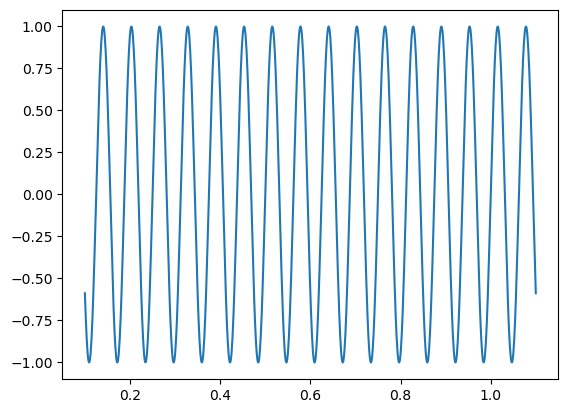

In [10]:
delay=0.1
time = np.linspace(0+delay, 1+delay, 1024)  # Generate 1024 time labels between 0 and 1 second.

frequency = 16 # Hz
signal = np.sin(2*np.pi*frequency*time)       # Generate 1024 samples of the sinusoidal signal. Element-wise

plt.plot(time, signal)          # Plot the signal (Note: the frequency 16Hz)

## 2. Generate noise we want to add to our signal

We choose a random white noise. We need to generate an array of the same length

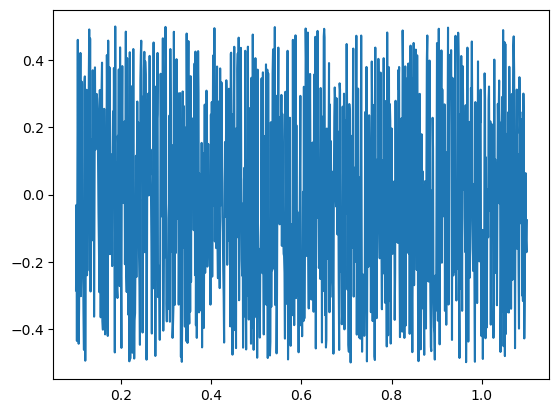

In [12]:
noise = np.random.rand(1024)-0.5  # Generate 1024 samples of random numbers between 0 and 1.

plt.plot(time, noise)         # Plot the nosie

## 3. Combine signal with noise

Adjust noise power with respect to the signal!

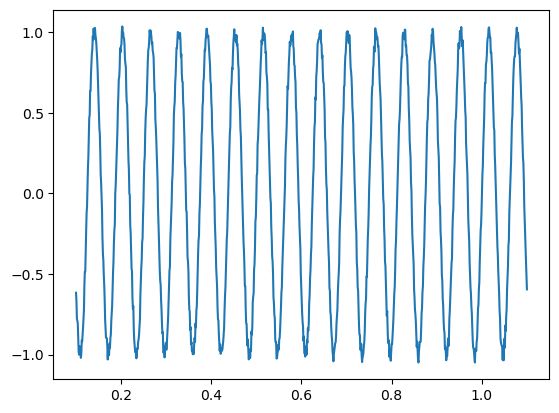

In [13]:
noisy_signal = signal + .10*noise # Change between 0, 0.1 and 10

plt.plot(time, noisy_signal)  # Plot the signal with the nosie

# 4. Perform Fast Fourier Transform using function form the SciPy library and watch the result.

The frequency term $f=k/n$ is found at $y[k]$. At $y[n/2]$ we reach the Nyquist frequency and wrap around to the negative-frequency terms. So, for an 8-point transform, the frequencies of the result are [0, 1, 2, 3, -4, -3, -2, -1]. To rearrange the fft output so that the zero-frequency component is centered, like [-4, -3, -2, -1, 0, 1, 2, 3], use fftshift.

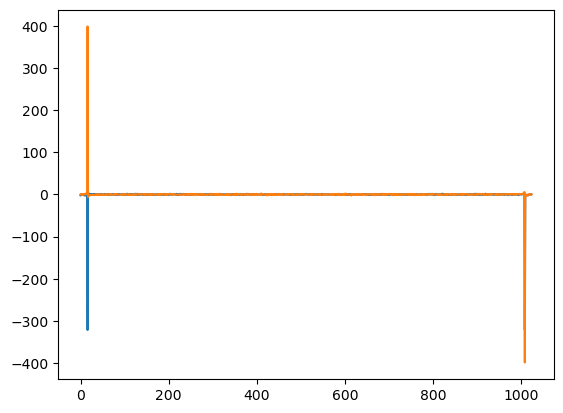

In [14]:
from scipy.fftpack import fft, fftfreq, fftshift

fft = fft(noisy_signal,n=1024)

plt.plot(fft.real)
plt.plot(fft.imag)

## 5. Change the fft output using fftshift.

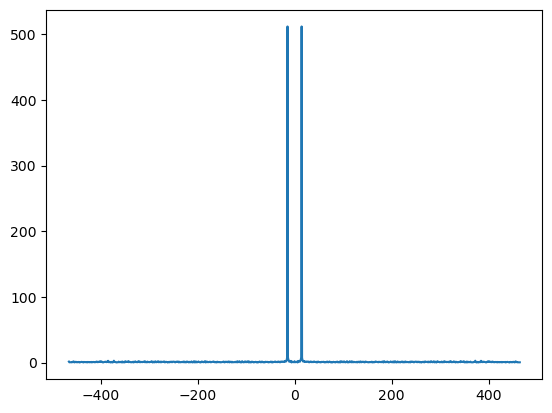

In [15]:
shifted_fft = fftshift(fft)
freq = fftshift(fftfreq(time.shape[-1], d=time[-1]/time.shape[-1]))

plt.plot(freq, abs(shifted_fft))

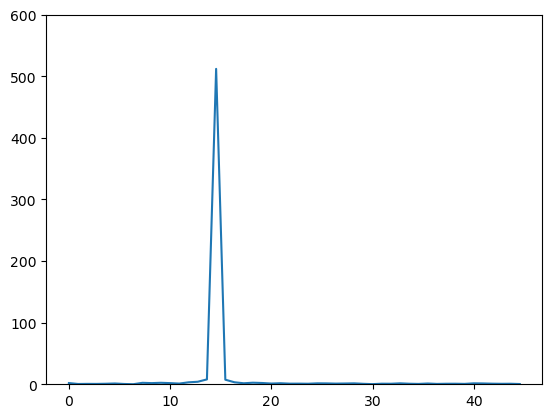

In [26]:
amp=np.absolute(shifted_fft)
phase=np.angle(shifted_fft, deg=True)
zero_freq = int(time.shape[-1]/2)
plt.ylim(0,600)
plt.plot(freq[zero_freq:zero_freq+50], amp[zero_freq:zero_freq+50])

## 6. To see better the contribution of noise plot in the log scale

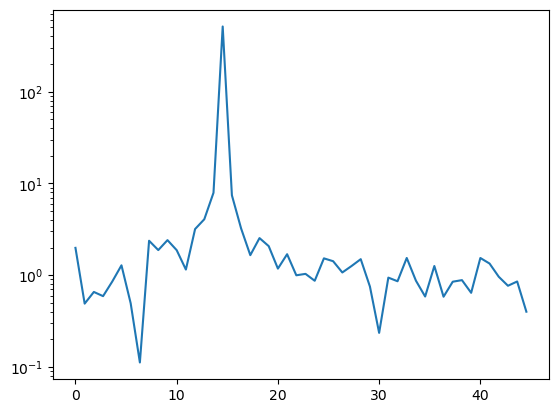

In [27]:
plt.semilogy(freq[zero_freq:zero_freq+50], amp[zero_freq:zero_freq+50])

# Play with parameters to understand better the undelying mechanism!

N.B. Negative frequencies in the FFT are exactly the same as the positive but their imaginary part has the opposite sign. This fact explains why we can multiply by factor 2 to obtain the right power estimation.

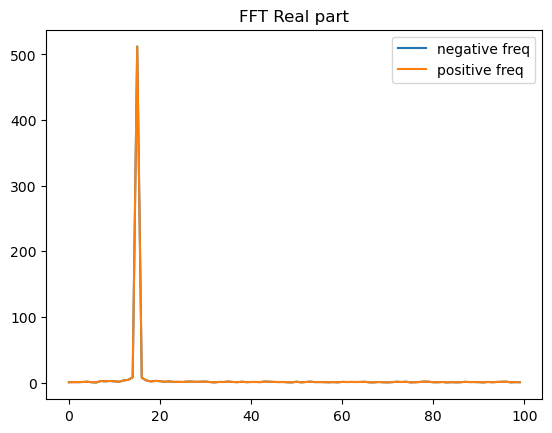

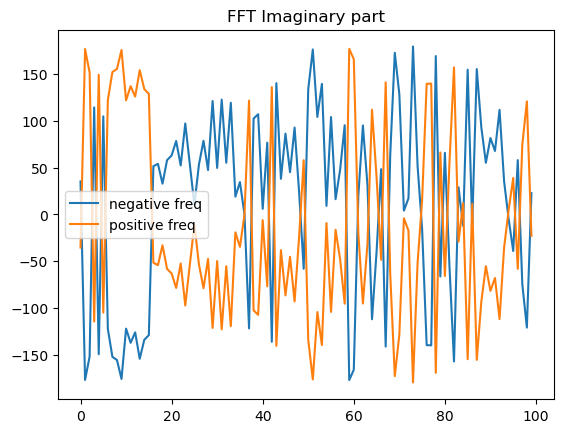

In [29]:
plt.plot(np.flip(amp[0:zero_freq])[0:100], label="negative freq")
plt.plot(amp[zero_freq+1:][0:100], label="positive freq")
plt.title("FFT Real part")
plt.legend()
plt.show()

#plt.ylim([-20,20])
plt.plot(np.flip(phase[0:zero_freq])[0:100], label="negative freq")
plt.plot(phase[zero_freq+1:][0:100], label="positive freq")
plt.title("FFT Imaginary part")
plt.legend()
plt.show()